In [2]:
# Import libraries
from sklearn import preprocessing
from SQLServer import SQLServer
from Statistics import Stats
import pandas as pd
import os

In [5]:
# Access data

# Init SQLServer connection and get data
Therabody = SQLServer('DbTherabody')
query = '''
    select
        Emp,
        agent_name,
        
        Date_Created,
        Date_Closed,
        Date_LastModified,
        Date_FirstResponseToCustomer,
        
        Case_Number,
        Case_RecordType,
        Case_Status,
        Case_Origin,
        Case_OriginAbs,
        Case_CSAT,
        Case_Disposition,
        Case_DispositionReason,
        Case_Disposition_Detailed,
        Case_Product,
        
        Case_FirstResponseToCustomerSeconds / 3600 Case_FRHours,
        Case_HandleTimeHours,
        Case_FRBusinessHours,
        1 as freq

    from V_Case
    where DateAbs_Created >= '2023-07-07'
'''

# Reach data
case = Therabody.select(query)
# case.to_csv('therabody_data.csv')
# case.to_csv('case.csv')

# path = os.path.join(os.path.abspath(os.getcwd()), 'datasets')
# case = pd.read_csv(f'{path}/therabody_data.csv')

In [6]:
# Set DataFrames

case_DispositionReason = case[['Case_DispositionReason', 'freq']].groupby(['Case_DispositionReason']).count() # .query('Case_DispositionReason != ""')

case_HandleTimeHours = case['Case_HandleTimeHours'][(case['Case_HandleTimeHours'] <= 20) & (case['Case_HandleTimeHours'] > 0)]

case_metrics = case[[
                    'Case_Product',
                    'Case_CSAT',
                    'Case_HandleTimeHours',
                    'Case_FRBusinessHours',
                    'Case_FRHours'
                ]].query('Case_CSAT != ""').groupby(['Case_Product']).mean()

case_scatter = case[['Date_Created', 'Case_FRBusinessHours', 'Case_CSAT']]

case_CSATProduct = case[['Case_Product', 'Case_CSAT']].groupby(['Case_Product']).mean()

In [7]:
# Init classes

stats = Stats()

In [8]:
# Describe & compare mvsk between distribution and Sample
vars = stats.describe(case_CSATProduct['Case_CSAT'], sample=True, standarize=False)
print(vars)

                 distribution  sample
n                   11.000000    11.0
mean                 2.688889     NaN
var                  2.757716     NaN
skew                 0.000000     NaN
kurtosis             1.000000     NaN
std                  0.275772     NaN
var coefficient      0.102560     NaN


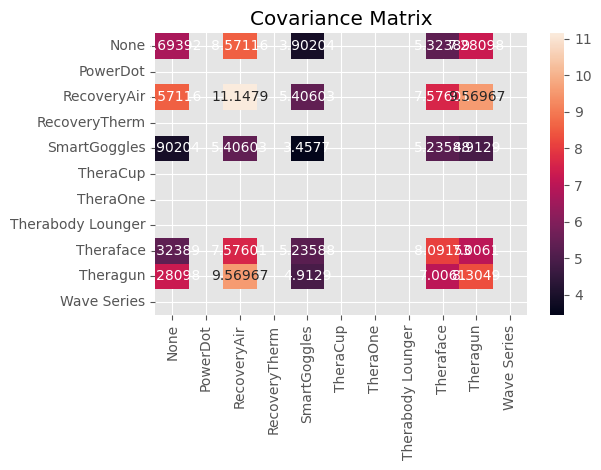

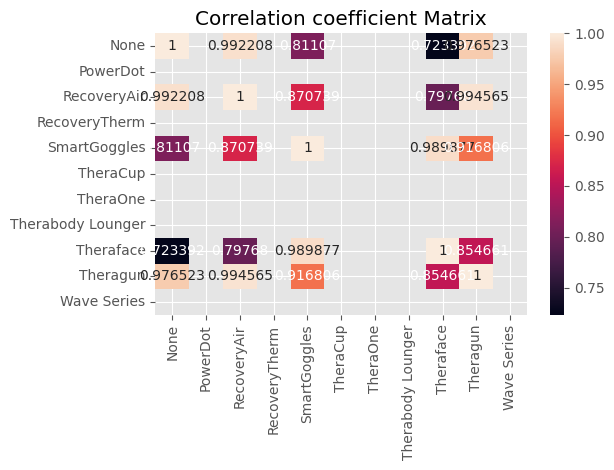

(array([[ 6.6939168 ,         nan,  8.57115515,         nan,  3.90204252,
                 nan,         nan,         nan,  5.32389282,  7.280979  ,
                 nan],
        [        nan,         nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         nan,
                 nan],
        [ 8.57115515,         nan, 11.14790734,         nan,  5.40602674,
                 nan,         nan,         nan,  7.57601257,  9.5696737 ,
                 nan],
        [        nan,         nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         nan,
                 nan],
        [ 3.90204252,         nan,  5.40602674,         nan,  3.45769959,
                 nan,         nan,         nan,  5.23588416,  4.91290437,
                 nan],
        [        nan,         nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         na

In [9]:
# Covariance and Correlation coefficient Matrix
stats.cov_corr(case_metrics)

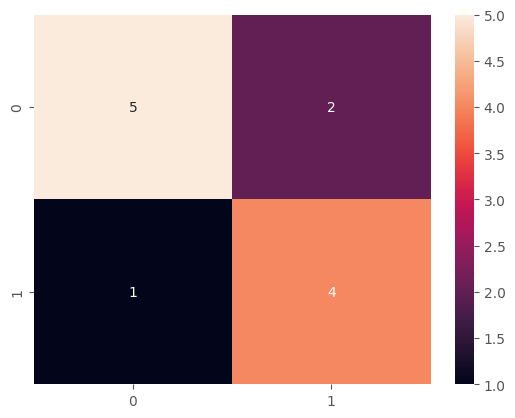

array([[5, 2],
       [1, 4]], dtype=int64)

In [10]:
# Confussion Matrix data
data = {'y_actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }
data_confussion_matrix = pd.DataFrame(data)

# Plot Confussion matrix
stats.confussion_matrix(data_confussion_matrix['y_actual'], data_confussion_matrix['y_predicted'], plot=True)

In [11]:
# Standarize distribution
a = stats.standarize_distribution(case_HandleTimeHours)
print(case_HandleTimeHours)
print(a)

x_scaled = preprocessing.scale(case_HandleTimeHours)
print(case_HandleTimeHours)
print(x_scaled)

0       0.15
1       0.13
2       0.13
3       2.03
4       0.08
        ... 
1411    0.16
1412    0.02
1414    3.13
1415    0.15
1416    0.01
Name: Case_HandleTimeHours, Length: 545, dtype: float64
0      -0.550164
1      -0.571968
2      -0.571968
3       1.499350
4      -0.626476
          ...   
1411   -0.539263
1412   -0.691886
1414    2.698533
1415   -0.550164
1416   -0.702788
Name: Case_HandleTimeHours, Length: 545, dtype: float64
0       0.15
1       0.13
2       0.13
3       2.03
4       0.08
        ... 
1411    0.16
1412    0.02
1414    3.13
1415    0.15
1416    0.01
Name: Case_HandleTimeHours, Length: 545, dtype: float64
[-0.55016422 -0.57196756 -0.57196756  1.49934953 -0.6264759  -0.57196756
 -0.31032751 -0.70278759 -0.70278759 -0.58286923 -0.57196756 -0.55016422
  2.51320473 -0.57196756 -0.69188592  2.63312309 -0.40844253 -0.5937709
 -0.68098425 -0.57196756  1.59746455 -0.58286923 -0.52836088  1.40123451
 -0.70278759  2.65492643 -0.58286923 -0.57196756 -0.58286923 -0.3866

In [12]:
# Apply Central Limit Theorem
a = stats.central_limit(case_HandleTimeHours, n_samples=1000, frac=0.6)
print(a)

[0.661, 0.694, 0.635, 0.643, 0.611, 0.602, 0.603, 0.652, 0.71, 0.626, 0.699, 0.65, 0.666, 0.65, 0.675, 0.657, 0.706, 0.665, 0.668, 0.671, 0.651, 0.734, 0.612, 0.715, 0.669, 0.642, 0.688, 0.691, 0.678, 0.596, 0.611, 0.694, 0.665, 0.629, 0.655, 0.668, 0.682, 0.652, 0.646, 0.73, 0.612, 0.614, 0.677, 0.648, 0.635, 0.695, 0.659, 0.64, 0.685, 0.651, 0.644, 0.601, 0.673, 0.607, 0.666, 0.652, 0.668, 0.732, 0.73, 0.709, 0.665, 0.653, 0.61, 0.697, 0.651, 0.678, 0.588, 0.706, 0.665, 0.673, 0.651, 0.662, 0.669, 0.66, 0.634, 0.632, 0.686, 0.677, 0.633, 0.648, 0.647, 0.632, 0.636, 0.636, 0.685, 0.639, 0.644, 0.659, 0.652, 0.709, 0.666, 0.614, 0.694, 0.642, 0.646, 0.608, 0.658, 0.686, 0.623, 0.655, 0.631, 0.664, 0.602, 0.634, 0.616, 0.695, 0.661, 0.635, 0.668, 0.664, 0.601, 0.632, 0.683, 0.647, 0.681, 0.707, 0.652, 0.678, 0.626, 0.629, 0.621, 0.71, 0.655, 0.628, 0.661, 0.682, 0.605, 0.681, 0.634, 0.672, 0.681, 0.676, 0.654, 0.66, 0.662, 0.651, 0.707, 0.622, 0.598, 0.685, 0.667, 0.64, 0.665, 0.654, 0.

In [13]:
# Confidence Interval. Specify var if known. Specify Hypothesis Test if needed
a = case_HandleTimeHours
confidence = 0.90
stats.confidence_interval(a, confidence, bilateral=False, var=None, var_assumed_equal=True, p_Test=None)

(0.6041977489227643, 0.7051233519946667)


(0.6041977489227643, 0.7051233519946667)

                                             freq    cum_freq
Case_DispositionReason                                       
Tracking Update                               155   23.065476
Warranty Policy Question                       93   36.904762
In Warranty Replacement                        67   46.875000
In Return Trial / Guarantee Period             54   54.910714
General Questions                              50   62.351190
Warranty Request Denied                        26   66.220238
Accessories                                    23   69.642857
Collaborations                                 22   72.916667
Order Cancellation                             22   76.190476
Features                                       20   79.166667
Refund Status                                  19   81.994048
Website Promotions                             17   84.523810
Out of Warranty Replacement                    11   86.160714
Replacement Status                             10   87.648810
Receipts

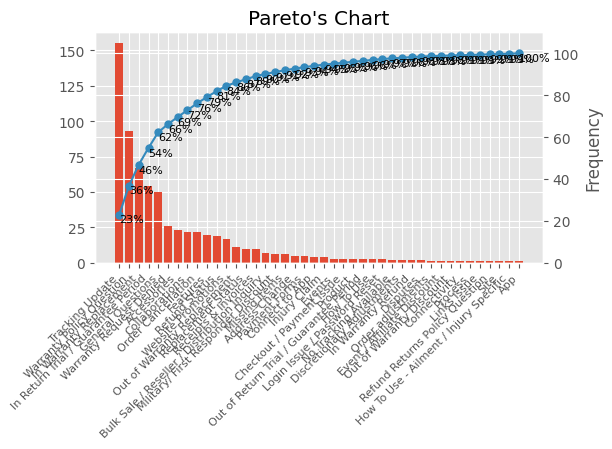

,freq,cum_freq
Case_DispositionReason,,
Tracking Update,155,23.065476
Warranty Policy Question,93,36.904762
In Warranty Replacement,67,46.875000
In Return Trial / Guarantee Period,54,54.910714
General Questions,50,62.351190
Warranty Request Denied,26,66.220238
Accessories,23,69.642857
Collaborations,22,72.916667
Order Cancellation,22,76.190476


In [14]:
# Plot Paretos chart
stats.pareto(case_DispositionReason, plot=True, xlim=False)

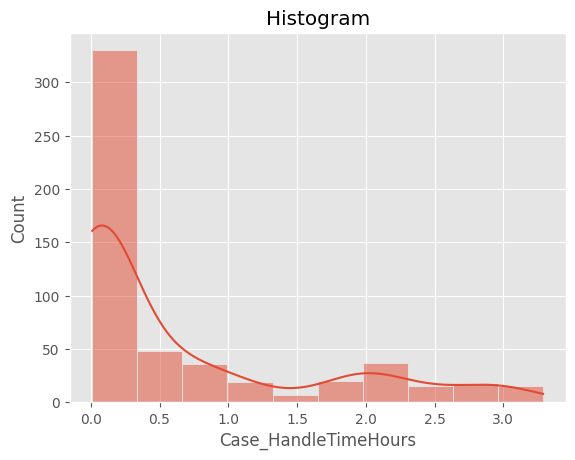

In [15]:
# Plot Histogram
stats.histogram(case_HandleTimeHours, bins=10, kde=True)

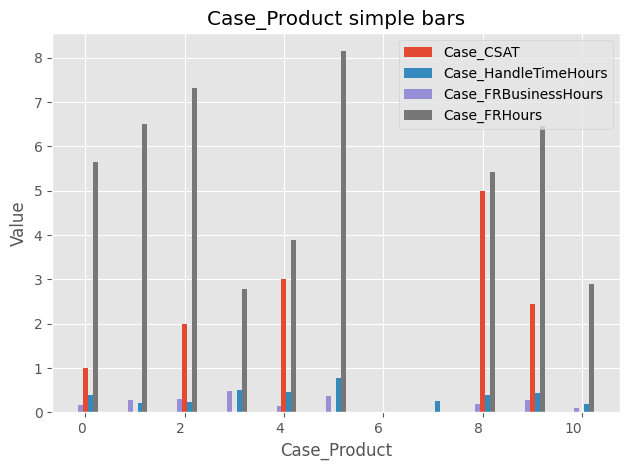

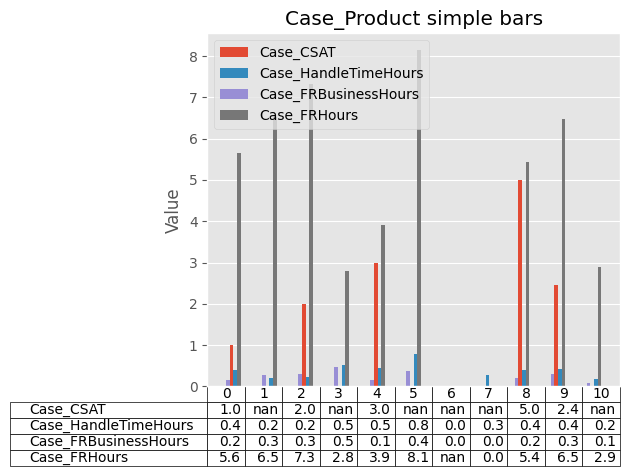

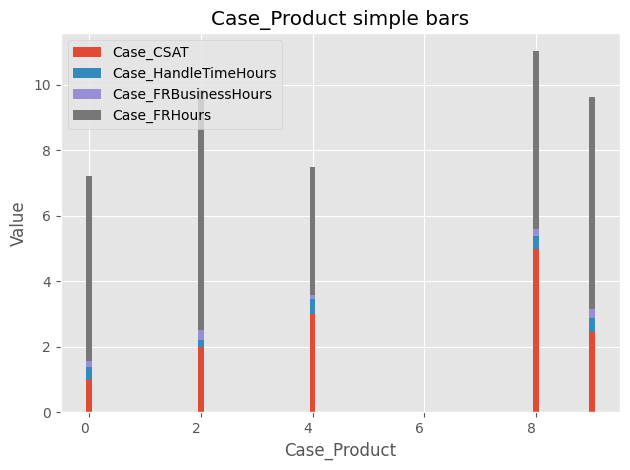

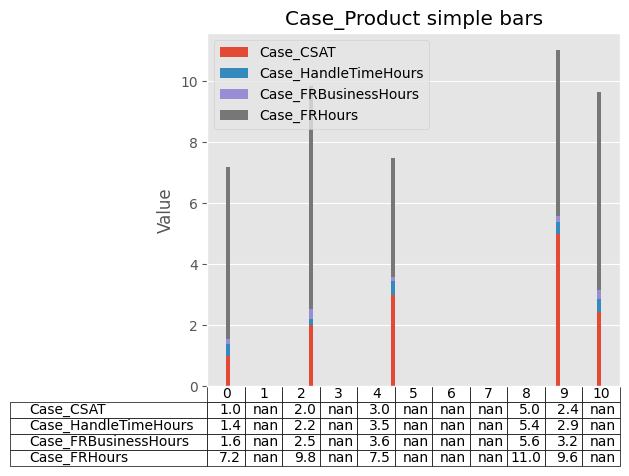

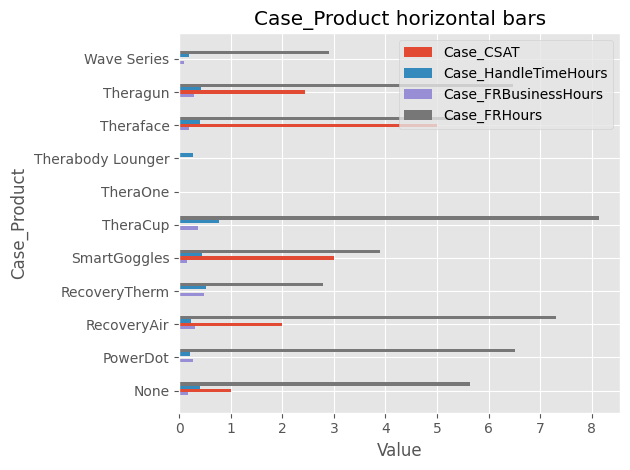

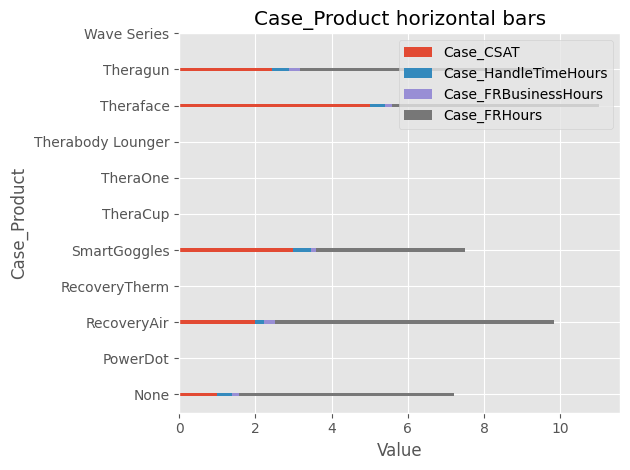

In [16]:
# Plot Bars charts
stats.bars(case_metrics, type='simple', stacked=False, rotation=0, table=False)
stats.bars(case_metrics, type='simple', stacked=False, rotation=0, table=True)
stats.bars(case_metrics, type='simple', stacked=True, rotation=0, table=False)
stats.bars(case_metrics, type='simple', stacked=True, rotation=0, table=True)
stats.bars(case_metrics, type='horizontal', stacked=False, rotation=0, table=False)
stats.bars(case_metrics, type='horizontal', stacked=True, rotation=0, table=False)

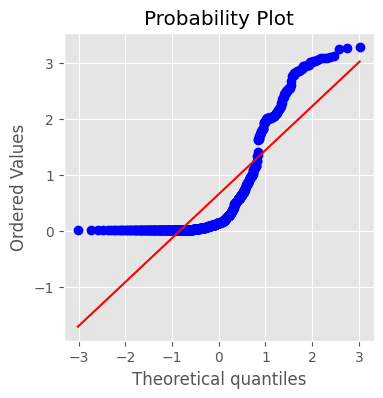

In [17]:
# Plot probplot
stats.probplot(case_HandleTimeHours)

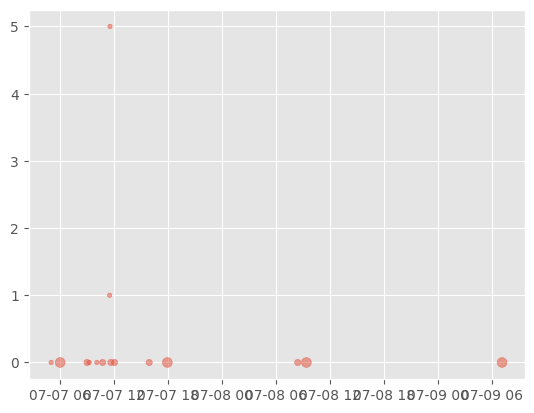

In [18]:
# Plot scatter
stats.scatter(case_scatter, colors=False, factor=10)